############################################################################  

###  University     : Stevens Institute of Technology
###  Project        : Stock Analysis using LSTM 
###  Course         : CS559A  
###  Members        : Ameya Yadav (CWId : 10459869), Omkar Sinha (CWId : 10468312)
###  Date           : 05/13/2021
### Build Platform  : Google Colab
############################################################################ 

### Description : 
#### Using LSTM. Its a artificial recurrent neural network. Will predict the closing stock price of a company. Will take into consideration past two months. Stock data to predict.

#### START : OWN CODE

##### Importing the required libraries

In [71]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn')

##### Checking the stock price of Microsoft and web scraping the data from Yahoo finance and taking start date from 01st Jan 2015 to 06th May 2021

In [72]:
df = web.DataReader('MSFT', data_source='yahoo', start='2015-01-01', end='2021-06-05')
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,254.350006,251.119995,253.399994,251.860001,19626600.0,251.860001
2021-05-04,251.210007,245.759995,250.970001,247.789993,32756100.0,247.789993
2021-05-05,249.500000,245.820007,249.059998,246.470001,21901300.0,246.470001
2021-05-06,249.860001,244.690002,246.449997,249.729996,26491100.0,249.729996
2021-05-07,254.300003,251.169998,252.149994,252.460007,27010100.0,252.460007
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993
2021-05-11,246.600006,242.570007,244.550003,246.229996,33641600.0,246.229996
2021-05-12,244.380005,238.070007,242.169998,239.000000,36684400.0,239.000000
2021-05-13,245.600006,241.419998,241.800003,243.029999,29624300.0,243.029999


##### Fetching the number of rows and columns.

In [73]:
df.shape

(1603, 6)

##### Checking the actual closing prices of Microsoft

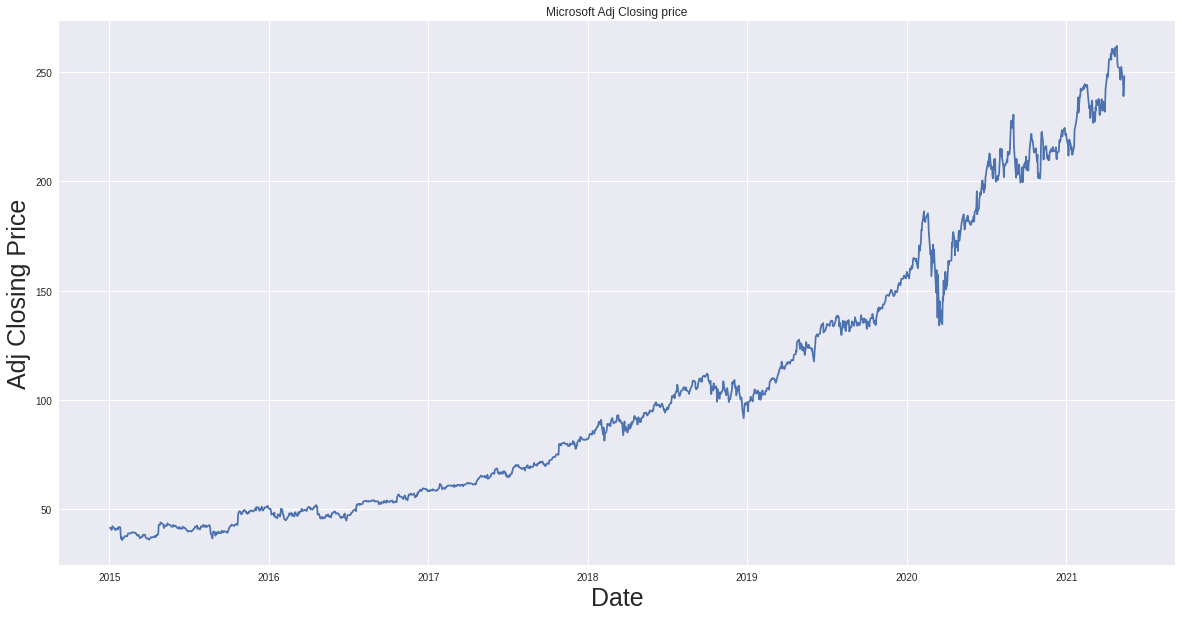

In [74]:
plt.figure(figsize=(20,10))
plt.title('Microsoft Adj Closing price')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=25)
plt.ylabel('Adj Closing Price', fontsize=25)
plt.show()

##### Create dataframe with close column and taking 80 % of the data as training dataset.




In [75]:
data=df.filter(['Adj Close'])
dataset=data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1283

##### **Data Scaling**
##### Scaling or normalizing the data before sending it to Neural Network

In [76]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02492404],
       [0.02323896],
       [0.02057413],
       ...,
       [0.89843618],
       [0.91625516],
       [0.93889366]])

##### Create traning data set
##### Create the scaled training dataset

In [77]:
train_data= scaled_data[0:training_data_len , :]
#Split data to x-train and y_train dataset

x_train= []
y_train= []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()
    

[array([0.02492404, 0.02323896, 0.02057413, 0.02284701, 0.02817671,
       0.02660921, 0.02429701, 0.02335651, 0.02178896, 0.01990793,
       0.02288626, 0.02347402, 0.02163221, 0.02637402, 0.02656994,
       0.02590378, 0.00885668, 0.00309586, 0.00630937, 0.        ,
       0.00344863, 0.00470264, 0.0056432 , 0.00803367, 0.00787689,
       0.00768102, 0.00862154, 0.0077594 , 0.01054178, 0.01359849,
       0.01367744, 0.0134801 , 0.01336166, 0.01478253, 0.01592711,
       0.01569027, 0.01529558, 0.01557188, 0.01474301, 0.01486145,
       0.01249338, 0.01162508, 0.01182246, 0.0088624 , 0.0107963 ,
       0.00755993, 0.00736264, 0.00357371, 0.00499456, 0.00570491,
       0.00625749, 0.00941493, 0.00858608, 0.01091468, 0.01083576,
       0.01099361, 0.00531029, 0.00432357, 0.00337637, 0.00333694])]
[0.002152871411937929]



##### Convert the x-train and y-train to numpy arrays

In [78]:
x_train, y_train = np.array(x_train), np.array(y_train)

##### **Reshaping data**
##### Drawback: Require 3D data (LSTM )
##### The LSTM NN expects the data to be 3 dimensional
##### i.e no of time stamps, no of features and no of samples
##### right now our data is only 2 dimensional 
##### ML - low dimensional data to high dimensional data. 

In [79]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1223, 60, 1)

##### Building the LSTM model

In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

##### **Compile model**
##### Using adam optimizer
##### Optimizer improves the loss function
##### Loss function finds out how well the model did on training

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')


##### **Train model** (will take some time if the epochs are set high)


In [82]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1223/1223 [==============================] - 37s 28ms/step - loss: 0.0044
Epoch 2/10
1223/1223 [==============================] - 33s 27ms/step - loss: 2.2910e-04
Epoch 3/10
1223/1223 [==============================] - 31s 26ms/step - loss: 1.4450e-04
Epoch 4/10
1223/1223 [==============================] - 31s 25ms/step - loss: 2.2105e-04
Epoch 5/10
1223/1223 [==============================] - 31s 25ms/step - loss: 2.0766e-04
Epoch 6/10
1223/1223 [==============================] - 31s 25ms/step - loss: 1.3841e-04
Epoch 7/10
1223/1223 [==============================] - 31s 25ms/step - loss: 1.4575e-04
Epoch 8/10
1223/1223 [==============================] - 31s 25ms/step - loss: 9.1692e-05
Epoch 9/10
1223/1223 [==============================] - 30s 25ms/step - loss: 1.2061e-04
Epoch 10/10
1223/1223 [==============================] - 30s 25ms/step - loss: 1.1166e-04


##### **Testing dataset**
##### Creating array with scaled values
##### 60 timestamps 
##### Testing data range

In [83]:
test_data= scaled_data[training_data_len - 60: , :]
#Create datasets x_test and y_test

x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60,len(test_data)):
   x_test.append(test_data[i-60:i, 0])


##### Converting data to numpy array. Therefore, we can use this array in the LSTM model

In [84]:
x_test = np.array(x_test)

##### Reshaping the data
##### Our dataset is still 2D and LSTM NN needs 3D data.

In [85]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

##### Get predicted price from model

In [86]:
predictions = model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

##### **Plotting and visualizing the data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


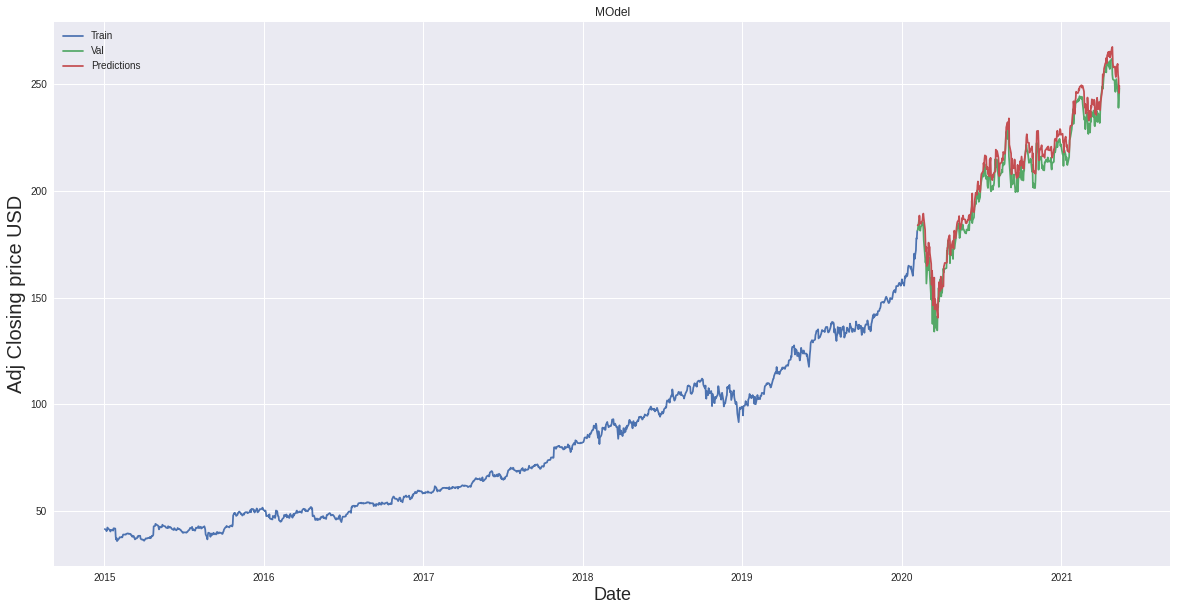

In [87]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(20,10))
plt.title('MOdel')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Closing price USD', fontsize=20)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In above plot we can see the validation data (green) and predicted data (red), flowing closely. So it's accuracy is great.

##### **Showing a table of close prices against Predictions**

In [88]:
valid

,Adj Close,Predictions
Date,,
2020-02-07,181.544250,183.883698
2020-02-10,186.292862,184.468048
2020-02-11,182.087234,188.468384
2020-02-12,182.353775,185.586197
2020-02-13,181.366547,185.210480
...,...,...
2021-05-10,247.179993,259.605621
2021-05-11,246.229996,254.585892
2021-05-12,239.000000,252.808640


##### **Model Evaluation**
##### Using root mean squared error - RMSE
##### Accuracy of model
##### A lower RMSE value/score means more accurate model

In [89]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print ("Error rate: " + str(rmse))

Error rate: 4.818627214431762


#### END : OWN CODE